In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
path = 'F://Uni/992/Digital Image Processing/Homeworks/DIP_HW3/inputs/P6/III/'
tshirt = cv2.imread(path+'t-shirt.png')
calm = cv2.imread(path+'keep_calm.png')

In [3]:
mask = np.zeros((tshirt.shape[0],tshirt.shape[1]))
sz = [tshirt.shape[0]-calm.shape[0],tshirt.shape[1]-calm.shape[1]]
mask[sz[0]//2:-sz[0]//2,sz[1]//2:-sz[1]//2] = cv2.cvtColor(calm, cv2.COLOR_BGR2GRAY)

In [4]:
calmpad = np.ones((tshirt.shape[0],tshirt.shape[1],3))*calm[2,2,:]
calmpad[sz[0]//2:-sz[0]//2,sz[1]//2:-sz[1]//2] = calm
calmpad = calmpad.astype('uint8')

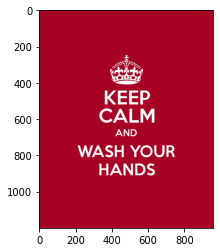

In [5]:
plt.imshow(cv2.cvtColor(calmpad, cv2.COLOR_BGR2RGB))

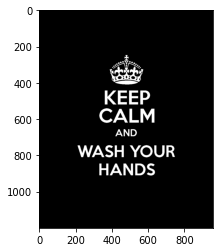

In [6]:
mask[mask<=112] = 0
mask[mask>112] = 1
plt.imshow(mask, cmap='gray')

In [7]:
def gaussian(m,n,sigma):
    gaussian_filter = np.zeros((m,n))
    a = m//2
    b = n//2
    for x in range(-a, a):
        for y in range(-b, b):
            x1 = np.sqrt(2*np.pi*(sigma**2))
            x2 = np.exp(-(x**2 + y**2)/(2* sigma**2))
            gaussian_filter[x+a-1, y+b-1] = x2
    return gaussian_filter

In [8]:
def filtered(img, layer, laplacian=False):
    grad_layers = []
    for i in range(1,layer+1):
        sigma = 2**(i-1)
        gaussian_filter = gaussian(img.shape[0],img.shape[1],sigma)
        img_fft = np.fft.fftshift(np.fft.fft2(img))
        filtered_fft = img_fft*gaussian_filter
        filtered_img = np.abs(np.fft.ifft2(filtered_fft))
        grad_layers.append(filtered_img)
    if laplacian:
        laplacian_layers = []
        for j in range(1,layer):
            laplacian_layers.append(grad_layers[j-1]-grad_layers[j])
        laplacian_layers.append(grad_layers[layer-1]-img)
    return laplacian_layers if laplacian else grad_layers

In [9]:
def combine(grad_mask, laplacian_a, laplacian_b, layer):
    combine_layers = []
    combined_img = np.zeros((grad_mask[0].shape[0],grad_mask[0].shape[1]))
    for i in range(layer):
        c = np.multiply(grad_mask[i],laplacian_a[i])+np.multiply(1-grad_mask[i],laplacian_b[i])
        combine_layers.append(c)
        combined_img += c
    return combined_img

In [10]:
layers = [6,12,18]

# num of layers = 6

In [11]:
tshirt_laplacian,calm_laplacian = [],[]

In [12]:
for c in range(3):
    tshirt_laplacian.append(filtered(tshirt[:,:,c],layers[0],True))
    calm_laplacian.append(filtered(calmpad[:,:,c],layers[0],True))
mask_gradient = filtered(mask,layers[0])

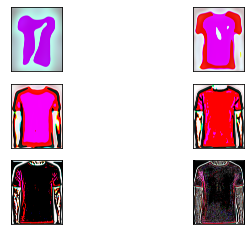

In [13]:
plt.figure()
for j in range(layers[0]):
    plt.subplot(3,2,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.dstack((tshirt_laplacian[2][j],tshirt_laplacian[1][j],tshirt_laplacian[0][j])).astype('uint8'))
plt.show()

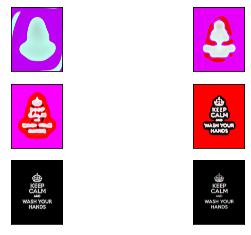

In [14]:
plt.figure()
for j in range(layers[0]):
    plt.subplot(3,2,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.dstack((calm_laplacian[2][j],calm_laplacian[1][j],calm_laplacian[0][j])).astype('uint8'))
plt.show()

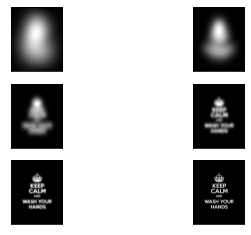

In [15]:
plt.figure()
for j in range(layers[0]):
    plt.subplot(3,2,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(mask_gradient[j], cmap='gray')
plt.show()

In [16]:
tshirt_calm_rgb = []
for i in range(3):
    ms = combine(mask_gradient, calm_laplacian[i], tshirt_laplacian[i], layers[0])
    ms = (1-((ms-np.min(ms))/(np.max(ms)-np.min(ms))))*255
    tshirt_calm_rgb.append(ms)
tshirt_calm = np.dstack((tshirt_calm_rgb[0],tshirt_calm_rgb[1],tshirt_calm_rgb[2]))
tshirt_calm = cv2.cvtColor(tshirt_calm.astype('uint8'), cv2.COLOR_BGR2RGB)
path = 'F://Uni/992/Digital Image Processing/Homeworks/DIP_HW3/outputs/P6/III/'
#plt.imsave(path+'tshirt_calm_'+str(layers[0])+'.png', tshirt_calm)

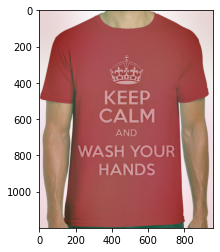

In [17]:
plt.imshow(tshirt_calm)
plt.show()

# num of layers = 12

In [18]:
tshirt_laplacian,calm_laplacian = [],[]

In [19]:
for c in range(3):
    tshirt_laplacian.append(filtered(tshirt[:,:,c],layers[1],True))
    calm_laplacian.append(filtered(calmpad[:,:,c],layers[1],True))
mask_gradient = filtered(mask,layers[1])

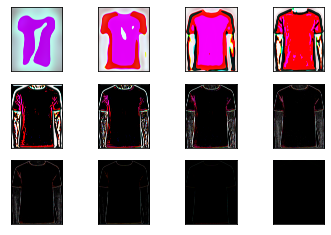

In [20]:
plt.figure()
for j in range(layers[1]):
    plt.subplot(3,4,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.dstack((tshirt_laplacian[2][j],tshirt_laplacian[1][j],tshirt_laplacian[0][j])).astype('uint8'))
plt.show()

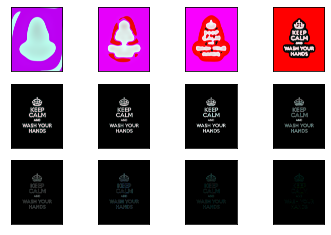

In [21]:
plt.figure()
for j in range(layers[1]):
    plt.subplot(3,4,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.dstack((calm_laplacian[2][j],calm_laplacian[1][j],calm_laplacian[0][j])).astype('uint8'))
plt.show()

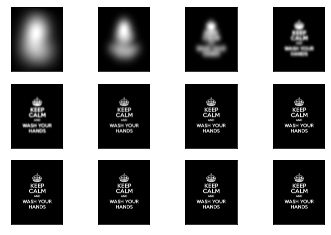

In [22]:
plt.figure()
for j in range(layers[1]):
    plt.subplot(3,4,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(mask_gradient[j], cmap='gray')
plt.show()

In [23]:
tshirt_calm_rgb = []
for i in range(3):
    ms = combine(mask_gradient, calm_laplacian[i], tshirt_laplacian[i], layers[1])
    ms = (1-((ms-np.min(ms))/(np.max(ms)-np.min(ms))))*255
    tshirt_calm_rgb.append(ms)
tshirt_calm = np.dstack((tshirt_calm_rgb[0],tshirt_calm_rgb[1],tshirt_calm_rgb[2]))
tshirt_calm = cv2.cvtColor(tshirt_calm.astype('uint8'), cv2.COLOR_BGR2RGB)
path = 'F://Uni/992/Digital Image Processing/Homeworks/DIP_HW3/outputs/P6/III/'
#plt.imsave(path+'tshirt_calm_'+str(layers[1])+'.png', tshirt_calm)

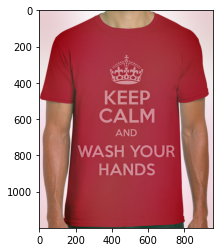

In [24]:
plt.imshow(tshirt_calm)
plt.show()

# num of layers = 18

In [25]:
tshirt_laplacian,calm_laplacian = [],[]

In [26]:
for c in range(3):
    tshirt_laplacian.append(filtered(tshirt[:,:,c],layers[2],True))
    calm_laplacian.append(filtered(calmpad[:,:,c],layers[2],True))
mask_gradient = filtered(mask,layers[2])

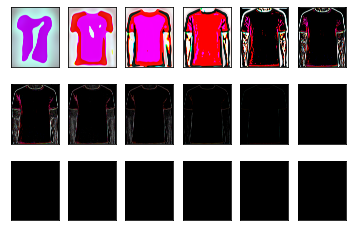

In [27]:
plt.figure()
for j in range(layers[2]):
    plt.subplot(3,6,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.dstack((tshirt_laplacian[2][j],tshirt_laplacian[1][j],tshirt_laplacian[0][j])).astype('uint8'))
plt.show()

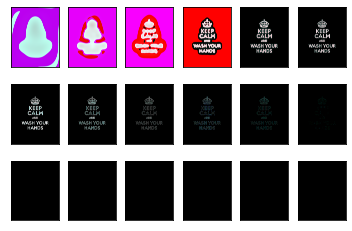

In [28]:
plt.figure()
for j in range(layers[2]):
    plt.subplot(3,6,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.dstack((calm_laplacian[2][j],calm_laplacian[1][j],calm_laplacian[0][j])).astype('uint8'))
plt.show()

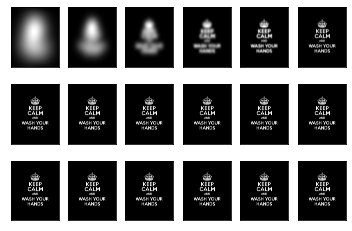

In [29]:
plt.figure()
for j in range(layers[2]):
    plt.subplot(3,6,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(mask_gradient[j], cmap='gray')
plt.show()

In [30]:
tshirt_calm_rgb = []
for i in range(3):
    ms = combine(mask_gradient, calm_laplacian[i], tshirt_laplacian[i], layers[2])
    ms = (1-((ms-np.min(ms))/(np.max(ms)-np.min(ms))))*255
    tshirt_calm_rgb.append(ms)
tshirt_calm = np.dstack((tshirt_calm_rgb[0],tshirt_calm_rgb[1],tshirt_calm_rgb[2]))
tshirt_calm = cv2.cvtColor(tshirt_calm.astype('uint8'), cv2.COLOR_BGR2RGB)
path = 'F://Uni/992/Digital Image Processing/Homeworks/DIP_HW3/outputs/P6/III/'
#plt.imsave(path+'tshirt_calm_'+str(layers[2])+'.png', tshirt_calm)

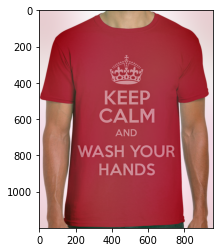

In [31]:
plt.imshow(tshirt_calm)
plt.show()